In [36]:
using Pkg
Pkg.activate("..")
using PlotlyJS
using StatsPlots
default(format="png")
plotlyjs()
using DataFrames
using CSV
using Dates

In [14]:
df = CSV.read("../data/customer-clustering/US Superstore data.csv", DataFrame;
    dateformat="m/d/yyyy",
    normalizenames=true,
    threaded=true)
first(df, 4)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name
,Int64,String,Date,Date,String,String,String
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute
2,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute
3,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff
4,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell


In [18]:
describe(select(df, Not(:Product_Name)))

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Row_ID,4997.5,1,4997.5,9994,0
2,Order_ID,,CA-2014-100006,,US-2017-169551,0
3,Order_Date,,2014-01-03,,2017-12-30,0
4,Ship_Date,,2014-01-07,,2018-01-05,0
5,Ship_Mode,,First Class,,Standard Class,0
6,Customer_ID,,AA-10315,,ZD-21925,0
7,Customer_Name,,Aaron Bergman,,Zuschuss Donatelli,0
8,Segment,,Consumer,,Home Office,0
9,Country,,United States,,United States,0


In [16]:
describe(select(df, [:Sales, :Discount, :Profit, :Quantity]))

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Sales,229.858,0.444,54.49,22638.5,0,Float64
2,Discount,0.156203,0.0,0.2,0.8,0,Float64
3,Profit,28.6569,-6599.98,8.6665,8399.98,0,Float64
4,Quantity,3.78957,1,3.0,14,0,Int64


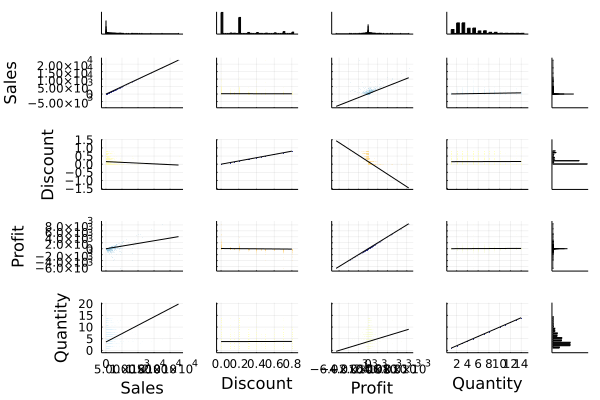

In [30]:
@df df cornerplot([:Sales :Discount :Profit :Quantity])

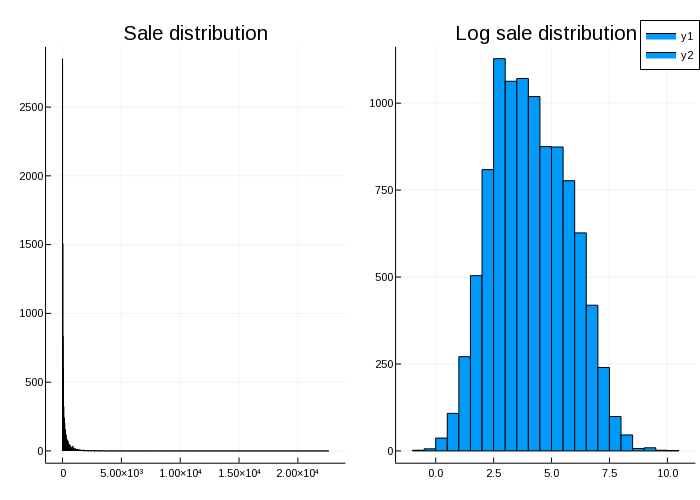

In [48]:
let p = StatsPlots.plot(layout=(1,2))
    StatsPlots.histogram!(p, df.Sales, title="Sale distribution")
    StatsPlots.histogram!(p, log.(df.Sales), subplot=2, title="Log sale distribution")
    p
end

In [49]:
using StatsBase

In [55]:
?percentile

search: percentile



```
percentile(x, p)
```

Return the `p`th percentile of a collection `x`, i.e. `quantile(x, p / 100)`.


In [76]:
function findoutliers(xs)
    q25, q75 = quantile(xs, [0.25, 0.75])
    iqr = q75 - q25
    cutOff = iqr * 1.5
    findall(x -> q25 - cutOff ≥ x || x ≥ q75 + cutOff, xs)
end

findoutliers (generic function with 1 method)

In [86]:
cleanDf = df[setdiff(1:size(df,1), findoutliers(df.Sales)), :];

In [104]:
let quantitySet = uniq

LoadError: Cannot convert Matrix{Symbol} to series data for plotting

In [125]:
StatsPlots.boxplot(df.Quantity, df.Sales, show_outliers=true)

<!DOCTYPE html>
 
 
 Plots.jl

In [122]:
?groupedboxplot

search: groupedboxplot groupedboxplot!



No documentation found.

`StatsPlots.groupedboxplot` is a `Function`.

```
# 1 method for generic function "groupedboxplot":
[1] groupedboxplot(args...; kw...) in StatsPlots at /home/hung/.cache/julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:357
```
